# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [23]:
# Take make moons in built dataset

data_ = datasets.make_moons(100)

In [24]:
# check the dataset

data_

(array([[ 8.40400105e-01, -4.87181783e-01],
        [-1.00000000e+00,  1.22464680e-16],
        [ 1.03205158e+00, -4.99486216e-01],
        [-4.62538290e-01,  8.86599306e-01],
        [ 9.26916757e-01,  3.75267005e-01],
        [ 4.04783343e-01,  9.14412623e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [-9.00968868e-01,  4.33883739e-01],
        [-9.81559157e-01,  1.91158629e-01],
        [ 9.49055747e-01,  3.15108218e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [ 3.45365054e-01,  9.38468422e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [-7.18349350e-01,  6.95682551e-01],
        [ 7.61445958e-01,  6.48228395e-01],
        [ 2.38554042e-01, -1.48228395e-01],
        [ 9.97945393e-01,  6.40702200e-02],
        [ 5.09442530e-02,  1.84891782e-01],
        [-5.72116660e-01,  8.20172255e-01],
        [ 5.37461710e-01, -3.86599306e-01],
        [ 9.67948422e-01, -4.99486216e-01],
        [-2.84527587e-01,  9.58667853e-01],
        [ 1.67230089e+00, -2.402

In [25]:
# create input dataframe
inputData = pd.DataFrame(data = data_[0])
inputData.head()


,0,1
0,0.840400,-4.871818e-01
1,-1.000000,1.224647e-16
2,1.032052,-4.994862e-01
3,-0.462538,8.865993e-01
4,0.926917,3.752670e-01


In [26]:
inputData.head()

,0,1
0,0.840400,-4.871818e-01
1,-1.000000,1.224647e-16
2,1.032052,-4.994862e-01
3,-0.462538,8.865993e-01
4,0.926917,3.752670e-01


In [28]:
# create output dataframe
outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,0
2,1
3,0
4,0


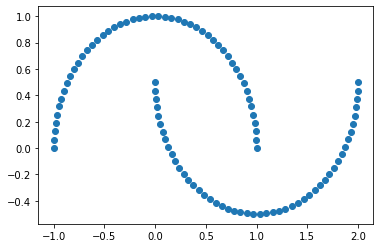

In [29]:
# create a scatter plot for inputData set

plt.scatter(inputData[0], inputData[1])


In [30]:
# create a scatter plot for inputData set with outputData color
outputData = pd.DataFrame(data = data_[1])
outputData.head()


,0
0,1
1,0
2,1
3,0
4,0


In [31]:
# Call the sklearn Kmeans and make a model with 200 samples

from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(inputData)
#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# check for labels

model.labels_

array([4, 2, 4, 2, 3, 3, 4, 2, 2, 4, 2, 3, 4, 2, 3, 0, 4, 0, 2, 4, 4, 2,
       1, 0, 3, 2, 4, 4, 1, 4, 1, 0, 3, 3, 1, 1, 4, 4, 3, 0, 3, 0, 1, 3,
       2, 1, 0, 0, 2, 4, 1, 3, 1, 1, 2, 2, 4, 3, 3, 0, 0, 4, 2, 1, 4, 3,
       4, 3, 4, 3, 2, 3, 2, 3, 3, 2, 0, 2, 0, 1, 1, 2, 1, 3, 2, 0, 0, 4,
       4, 3, 2, 0, 4, 0, 3, 2, 1, 4, 1, 1], dtype=int32)

In [33]:
# call metrics and check silhoutte score
from sklearn import metrics
metrics.silhouette_score(inputData, model.labels_)

0.473852815276961

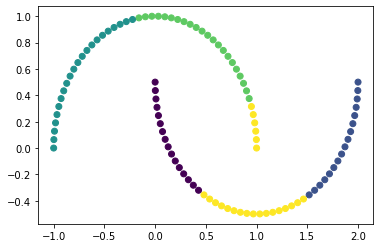

In [34]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [35]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

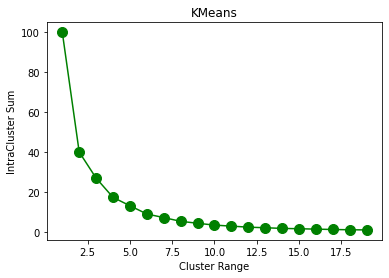

In [37]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()